# Analysis of PolyaClassifier site definition for *S. cerevisiae*

**Purpose**: To identify 5mer motifs important to cleavage site definition in *S. cerevisiae* through a systematic mutation approach.


In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%run -i notebook_setup.py

## IMPORTS AND SETUP

In [4]:
from paper_utilities import motifs

In [5]:
species   = 'saccharomyces_cerevisiae'
modeltype = 'polyaclassifier'
config    = 'polyaclassifier_bagging3_kmers-5'
kmer      = 5


In [6]:
PROJECT   = "/projects/b1080/eks/polyadenylation/yeast"
OUTDIR    = os.path.join(PROJECT, 'manuscript', 'analysis', 'polyaclassifier_motif_importance_scer_5mers')
RESOURCES = os.path.join(os.path.dirname(OUTDIR), 'resources')
os.makedirs(OUTDIR, exist_ok = True)


In [7]:
## Load model configuration information

with open(os.path.join(RESOURCES, 'polyaclassifier_configurations.pickle'), mode = 'rb') as handle:
    configurations = pickle.load(handle)

gold_sites = configurations[species][config]['golden_lines']
print("\nNumber of golden sites:", gold_sites)

mot_dis_dir = os.path.join(PROJECT, species, 'analysis', 'motif_analysis', 'motif_disruption', config)
print("\nDirectory containing motif disruption results:", mot_dis_dir)



Number of golden sites: 11673

Directory containing motif disruption results: /projects/b1080/eks/polyadenylation/yeast/saccharomyces_cerevisiae/analysis/motif_analysis/motif_disruption/polyaclassifier_bagging3_kmers-5


In [8]:
## Load motif family definitions for S. cerevisiae

scer_definitions = {'patterns' : {}, 'distance' : {}}

# By pattern - we only look at pattern families for 6mers
with open(os.path.join(RESOURCES, f'motif_definitions.scer.6mers.patterns.pickle'), mode = 'rb') as handle:
    scer_definitions['patterns'][6] = pickle.load(handle)
    
scer_definitions['patterns'][5] = {'family':{}}
scer_definitions['patterns'][4] = {'family':{}}

# By Hamming distance
for kmer in [4,5,6]:
    with open(os.path.join(RESOURCES, f'motif_definitions.scer.{kmer}mers.distance.pickle'), mode = 'rb') as handle:
        scer_definitions['distance'][kmer] = pickle.load(handle)


In [9]:
with open(os.path.join(RESOURCES, 'polyaclassifier_motifs.significant_motifs.pickle'), mode = 'rb') as handle:
    significant_motifs = pickle.load(handle)

sigmots = significant_motifs[species][modeltype][config]
print(f"Significant motifs = {len(sigmots)}")


Significant motifs = 51


# ANALYSIS

In [10]:
family_cmap = {
    'A-rich'        : '#2278B5',
    'A-rich_d0'     : '#2278B5',
    'A-rich_d1'     : '#6AB1E3',
    'A-rich_d2'     : '#9CCBEC',
    'T-rich'        : '#2FA148',
    'T-rich_d0'     : '#2FA148',
    'T-rich_d1'     : '#73D689',
    'T-rich_d2'     : '#A1E4B0',
    'TA/TA-rich'    : '#D62A28',
    'TA/TA-rich_d0' : '#D62A28',
    'TA/TA-rich_d1' : '#E77F7E',
    'TA/TA-rich_d2' : '#EFAAA9',
    'G/A-rich'      : '#956CB4',
    'G/A-rich_d0'   : '#956CB4',
    'Other'         : '#F7F8F8',
    'Pattern'       : '#000000',
}


## Top individual motifs in each region

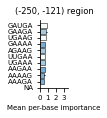

    motif  frequency     score   conf_lo   conf_hi     family  error_lo
23  GAUGA       2731  0.895650  0.923993  0.867308      Other  0.028342
22  GAAGA       4544  0.807663  0.826727  0.788600  A-rich_d2  0.019063
36  UGAAG       3547  0.766897  0.790513  0.743281      Other  0.023616
21  GAAAA       5070  0.664268  0.679613  0.648924  A-rich_d1  0.015345
10  AGAAG       3957  0.625777  0.643513  0.608042  A-rich_d2  0.017736
42  UUGAA       4003  0.607740  0.624750  0.590731      Other  0.017010
35  UGAAA       4025  0.601350  0.619060  0.583640  A-rich_d2  0.017710
5   AAGAA       5938  0.591707  0.605348  0.578066  A-rich_d1  0.013641
1   AAAAG       4489  0.564070  0.579695  0.548445  A-rich_d1  0.015625
3   AAAGA       4948  0.549420  0.564599  0.534241  A-rich_d1  0.015179
0.923992884209518


In [11]:
motifs.region_barplot(OUTDIR, mot_dis_dir, scer_definitions['distance'][5]['hamming'], sigmots, 
                      (-250,-121), "mean", 95, method = "hamming", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,3.5), xtickint = 1, verbose = True
                     )


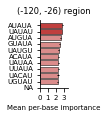

    motif  frequency     score   conf_lo   conf_hi         family  error_lo
14  AUAUA       7049  2.830005  2.871978  2.788033  TA/TA-rich_d0  0.041973
30  UAUAU       6871  2.769177  2.811986  2.726367  TA/TA-rich_d0  0.042809
16  AUGUA       3944  2.591078  2.658849  2.523307  TA/TA-rich_d1  0.067771
24  GUAUA       4024  2.469829  2.532767  2.406891  TA/TA-rich_d1  0.062938
31  UAUGU       3683  2.367310  2.439200  2.295420  TA/TA-rich_d1  0.071890
8   ACAUA       3576  2.310287  2.372092  2.248482  TA/TA-rich_d1  0.061805
28  UAUAA       5042  2.297182  2.353855  2.240508  TA/TA-rich_d1  0.056674
38  UUAUA       4851  2.282769  2.338758  2.226779  TA/TA-rich_d1  0.055989
27  UACAU       3635  2.265830  2.329345  2.202314  TA/TA-rich_d1  0.063515
37  UGUAU       4067  2.258581  2.316742  2.200420  TA/TA-rich_d1  0.058161
2.8719779294324157


In [12]:
motifs.region_barplot(OUTDIR, mot_dis_dir, scer_definitions['distance'][5]['hamming'], sigmots, 
                      (-120,-26), "mean", 95, method = "hamming", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,3.5), xtickint = 1, verbose = True
                     )


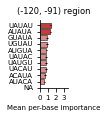

    motif  frequency     score   conf_lo   conf_hi         family  error_lo
30  UAUAU       1334  1.352449  1.427681  1.277217  TA/TA-rich_d0  0.075232
14  AUAUA       1433  1.302510  1.374877  1.230143  TA/TA-rich_d0  0.072367
24  GUAUA        719  0.862469  0.976333  0.748605  TA/TA-rich_d1  0.113864
37  UGUAU        837  0.858636  0.953180  0.764093  TA/TA-rich_d1  0.094543
16  AUGUA        768  0.811371  0.918042  0.704700  TA/TA-rich_d1  0.106671
29  UAUAC        683  0.784114  0.893252  0.674976  TA/TA-rich_d1  0.109138
31  UAUGU        788  0.777545  0.880015  0.675076  TA/TA-rich_d1  0.102470
27  UACAU        681  0.765992  0.867948  0.664037  TA/TA-rich_d1  0.101955
8   ACAUA        663  0.668252  0.769986  0.566519  TA/TA-rich_d1  0.101733
13  AUACA        675  0.569266  0.660276  0.478257  TA/TA-rich_d1  0.091009
1.427680664919425


In [13]:
motifs.region_barplot(OUTDIR, mot_dis_dir, scer_definitions['distance'][5]['hamming'], sigmots, 
                      (-120,-91), "mean", 95, method = "hamming", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,3.5), xtickint = 1, verbose = True
                     )


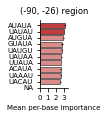

    motif  frequency     score   conf_lo   conf_hi         family  error_lo
14  AUAUA       6292  3.100009  3.146178  3.053840  TA/TA-rich_d0  0.046169
30  UAUAU       6205  3.013105  3.060304  2.965906  TA/TA-rich_d0  0.047199
16  AUGUA       3396  2.942000  3.015783  2.868218  TA/TA-rich_d1  0.073782
24  GUAUA       3503  2.771503  2.839269  2.703737  TA/TA-rich_d1  0.067766
31  UAUGU       3127  2.711950  2.792580  2.631321  TA/TA-rich_d1  0.080630
28  UAUAA       4375  2.700258  2.760112  2.640403  TA/TA-rich_d1  0.059855
38  UUAUA       4223  2.644102  2.704579  2.583625  TA/TA-rich_d1  0.060477
8   ACAUA       3121  2.609744  2.676327  2.543161  TA/TA-rich_d1  0.066583
25  UAAAU       3742  2.591626  2.655711  2.527541  TA/TA-rich_d1  0.064085
27  UACAU       3129  2.554321  2.623817  2.484825  TA/TA-rich_d1  0.069496
3.146178365389428


In [14]:
motifs.region_barplot(OUTDIR, mot_dis_dir, scer_definitions['distance'][5]['hamming'], sigmots, 
                      (-90,-26), "mean", 95, method = "hamming", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,3.5), xtickint = 1, verbose = True
                     )


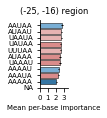

   motif  frequency     score   conf_lo   conf_hi         family  error_lo
0  AAUAA       1139  2.775078  2.872807  2.677350      A-rich_d1  0.097729
1  AUAAU        984  2.693248  2.784614  2.601883  TA/TA-rich_d2  0.091365
2  UAAUA       1056  2.687031  2.783084  2.590978  TA/TA-rich_d2  0.096053
3  UAUAA       1009  2.584612  2.688621  2.480603  TA/TA-rich_d1  0.104009
4  UUUAA        926  2.582575  2.674613  2.490537  TA/TA-rich_d2  0.092038
5  AUAAA       1163  2.545736  2.638958  2.452513  TA/TA-rich_d1  0.093222
6  UAAAU        763  2.517358  2.631697  2.403020  TA/TA-rich_d1  0.114339
7  AAAAU       1029  2.346535  2.431891  2.261179      A-rich_d1  0.085356
8  AAAUA        936  2.324675  2.430866  2.218484  TA/TA-rich_d1  0.106191
9  AAAAA        842  2.069672  2.155795  1.983549      A-rich_d0  0.086123
2.8728073878925526


In [15]:
motifs.region_barplot(OUTDIR, mot_dis_dir, scer_definitions['distance'][5]['hamming'], sigmots, 
                      (-25,-16), "mean", 95, method = "hamming", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, 
                      topn = 10, displaylist = ['AAAAA'],
                      xlim = (0,3.5), xtickint = 1, verbose = True
                     )


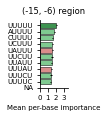

    motif  frequency     score   conf_lo   conf_hi         family  error_lo
50  UUUUU       1271  2.029393  2.086282  1.972504      T-rich_d0  0.056889
18  AUUUU       1244  1.774537  1.844336  1.704738      T-rich_d1  0.069799
20  CUUUU        905  1.614510  1.700052  1.528968      T-rich_d1  0.085542
34  UCUUU        709  1.553227  1.636225  1.470228      T-rich_d1  0.082999
32  UAUUU       1001  1.550177  1.620563  1.479790  TA/TA-rich_d1  0.070387
41  UUCUU        684  1.530098  1.610568  1.449628      T-rich_d1  0.080470
39  UUAUU        839  1.497494  1.562268  1.432720      T-rich_d1  0.064774
44  UUUAU        847  1.397218  1.466120  1.328316  TA/TA-rich_d1  0.068902
46  UUUCU        748  1.390595  1.457910  1.323280      T-rich_d1  0.067315
48  UUUUC        754  1.343959  1.423004  1.264914      T-rich_d1  0.079045
2.086282302641245


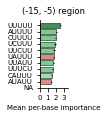

    motif  frequency     score   conf_lo   conf_hi         family  error_lo
50  UUUUU       1596  2.539796  2.602193  2.477400      T-rich_d0  0.062397
18  AUUUU       1479  2.029020  2.099740  1.958300      T-rich_d1  0.070720
20  CUUUU       1110  1.978760  2.069467  1.888052      T-rich_d1  0.090707
34  UCUUU        854  1.911126  2.008596  1.813655      T-rich_d1  0.097471
41  UUCUU        828  1.759345  1.839924  1.678767      T-rich_d1  0.080578
32  UAUUU       1134  1.724567  1.796949  1.652185  TA/TA-rich_d1  0.072382
39  UUAUU        947  1.647118  1.713232  1.581004      T-rich_d1  0.066114
46  UUUCU        849  1.586054  1.665220  1.506887      T-rich_d1  0.079167
19  CAUUU        640  1.467070  1.556580  1.377560      T-rich_d2  0.089510
15  AUAUU        765  1.419383  1.497333  1.341432  TA/TA-rich_d1  0.077950
2.60219326850774


In [16]:
motifs.region_barplot(OUTDIR, mot_dis_dir, scer_definitions['distance'][5]['hamming'], sigmots, 
                      (-15,-6), "mean", 95, method = "hamming", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,3.5), xtickint = 1, verbose = True
                     )

motifs.region_barplot(OUTDIR, mot_dis_dir, scer_definitions['distance'][5]['hamming'], sigmots, 
                      (-15,-5), "mean", 95, method = "hamming", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,3.5), xtickint = 1, verbose = True
                     )


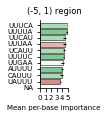

    motif  frequency     score   conf_lo   conf_hi         family  error_lo
45  UUUCA        467  5.148728  5.363102  4.934354      T-rich_d2  0.214374
47  UUUUA        779  4.787379  4.948607  4.626151      T-rich_d1  0.161228
40  UUCAU        378  4.438592  4.695676  4.181509      T-rich_d2  0.257083
43  UUUAA        397  4.421425  4.668303  4.174547  TA/TA-rich_d2  0.246878
33  UCAUU        386  4.320024  4.550001  4.090048      T-rich_d2  0.229976
48  UUUUC        722  4.237525  4.380495  4.094555      T-rich_d1  0.142970
42  UUGAA        207  4.047815  4.383945  3.711685          Other  0.336130
18  AUUUU        799  3.952668  4.081541  3.823796      T-rich_d1  0.128873
19  CAUUU        402  3.887549  4.090272  3.684826      T-rich_d2  0.202723
32  UAUUU        740  3.663026  3.789021  3.537031  TA/TA-rich_d1  0.125995
5.3631018207637


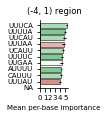

    motif  frequency     score   conf_lo   conf_hi         family  error_lo
45  UUUCA        453  5.302024  5.506875  5.097173      T-rich_d2  0.204851
47  UUUUA        747  4.959452  5.115350  4.803553      T-rich_d1  0.155898
40  UUCAU        346  4.823353  5.065573  4.581132      T-rich_d2  0.242220
43  UUUAA        382  4.664951  4.887178  4.442725  TA/TA-rich_d2  0.222226
33  UCAUU        351  4.522228  4.762859  4.281598      T-rich_d2  0.240631
48  UUUUC        672  4.369806  4.517646  4.221966      T-rich_d1  0.147840
42  UUGAA        201  4.255987  4.557150  3.954825          Other  0.301162
18  AUUUU        561  4.241010  4.405991  4.076028      T-rich_d1  0.164981
19  CAUUU        337  4.126705  4.356381  3.897030      T-rich_d2  0.229675
44  UUUAU        593  3.885777  4.066014  3.705539  TA/TA-rich_d1  0.180238
5.506875460192685


In [17]:
motifs.region_barplot(OUTDIR, mot_dis_dir, scer_definitions['distance'][5]['hamming'], sigmots, 
                      (-5,1), "mean", 95, method = "hamming", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,5), xtickint = 1, verbose = True
                     )

motifs.region_barplot(OUTDIR, mot_dis_dir, scer_definitions['distance'][5]['hamming'], sigmots, 
                      (-4,1), "mean", 95, method = "hamming", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,5.5), xtickint = 1, verbose = True
                     )


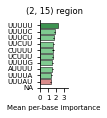

    motif  frequency     score   conf_lo   conf_hi         family  error_lo
50  UUUUU       1847  2.250697  2.292339  2.209056      T-rich_d0  0.041642
48  UUUUC       1361  1.825445  1.883008  1.767883      T-rich_d1  0.057563
46  UUUCU       1179  1.715721  1.775624  1.655818      T-rich_d1  0.059903
41  UUCUU       1060  1.657624  1.723678  1.591569      T-rich_d1  0.066055
20  CUUUU       1193  1.620646  1.685930  1.555361      T-rich_d1  0.065284
34  UCUUU       1026  1.559216  1.623645  1.494787      T-rich_d1  0.064429
49  UUUUG        862  1.554418  1.625485  1.483350      T-rich_d1  0.071067
18  AUUUU       1295  1.514004  1.574867  1.453142      T-rich_d1  0.060862
47  UUUUA       1126  1.407754  1.466269  1.349239      T-rich_d1  0.058515
44  UUUAU       1088  1.331679  1.391262  1.272096  TA/TA-rich_d1  0.059583
2.2923390841570295


In [18]:
motifs.region_barplot(OUTDIR, mot_dis_dir, scer_definitions['distance'][5]['hamming'], sigmots, 
                      (2,15), "mean", 95, method = "hamming", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,3.5), xtickint = 1, verbose = True
                     )
